<a href="https://colab.research.google.com/github/marquesgabi/Trabalho2/blob/master/ANNTrabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import os 
import cv2
import re, random

!pip install keras-tqdm
import keras
from tqdm import tqdm_notebook
from random import shuffle
import shutil
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras_tqdm import TQDMNotebookCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import Callback
from keras.preprocessing.image import img_to_array, load_img
from keras import layers, models, optimizers
from keras import backend as K
from sklearn.metrics import confusion_matrix
import itertools

import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [0]:
# http://ftp.feq.ufu.br/ubirajara/
# https://www.noip.com/support/knowledgebase/setting-up-a-ftp-server-on-your-home-computer/

In [9]:
# local dos dados
!git clone https://github.com/marquesgabi/Trabalho2/
%cd Trabalho2
!ls

Cloning into 'Trabalho2'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 87 (delta 0), reused 0 (delta 0), pack-reused 84
Unpacking objects: 100% (87/87), done.
/content/Trabalho2/Trabalho2
AM1_10.jpg  AM1_8.jpg	AM2_6.jpg   AM3_4.jpg	AM4_2.jpg   AM5_15.jpg
AM1_11.jpg  AM1_9.jpg	AM2_7.jpg   AM3_5.jpg	AM4_3.jpg   AM5_1.jpg
AM1_12.jpg  AM2_10.jpg	AM2_8.jpg   AM3_6.jpg	AM4_4.jpg   AM5_2.jpg
AM1_13.jpg  AM2_11.jpg	AM2_9.jpg   AM3_7.jpg	AM4_5.jpg   AM5_3.jpg
AM1_14.jpg  AM2_12.jpg	AM3_10.jpg  AM3_8.jpg	AM4_6.jpg   AM5_4.jpg
AM1_15.jpg  AM2_13.jpg	AM3_11.jpg  AM3_9.jpg	AM4_7.jpg   AM5_5.jpg
AM1_1.jpg   AM2_14.jpg	AM3_12.jpg  AM4_10.jpg	AM4_8.jpg   AM5_6.jpg
AM1_2.jpg   AM2_15.jpg	AM3_13.jpg  AM4_11.jpg	AM4_9.jpg   AM5_7.jpg
AM1_3.jpg   AM2_1.jpg	AM3_14.jpg  AM4_12.jpg	AM5_10.jpg  AM5_8.jpg
AM1_4.jpg   AM2_2.jpg	AM3_15.jpg  AM4_13.jpg	AM5_11.jpg  AM5_9.jpg
AM1_5.jpg   AM2_3.jpg	AM3_1.jpg   AM4_14.

In [0]:
#!wget http://ftp.feq.ufu.br/ubirajara/trash_nov_22_2018.zip
#!ls -l trash_nov_22_2018.zip


In [0]:
import zipfile
file_name = zipfile.ZipFile('TrabalhoANN-2.zip', 'r')
file_name.extractall() 


In [18]:
# all images are load in variable x...
FILE='TrabalhoANN-2.zip'
img_name=[]
x=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        #x.append(cv2.imread(name))
        x.append(cv2.resize(cv2.imread(name),(64,64)))
print(img_name)      

['TrabalhoANN-2/AM1_1.jpg', 'TrabalhoANN-2/AM1_10.jpg', 'TrabalhoANN-2/AM1_11.jpg', 'TrabalhoANN-2/AM1_12.jpg', 'TrabalhoANN-2/AM1_13.jpg', 'TrabalhoANN-2/AM1_14.jpg', 'TrabalhoANN-2/AM1_15.jpg', 'TrabalhoANN-2/AM1_2.jpg', 'TrabalhoANN-2/AM1_3.jpg', 'TrabalhoANN-2/AM1_4.jpg', 'TrabalhoANN-2/AM1_5.jpg', 'TrabalhoANN-2/AM1_6.jpg', 'TrabalhoANN-2/AM1_7.jpg', 'TrabalhoANN-2/AM1_8.jpg', 'TrabalhoANN-2/AM1_9.jpg', 'TrabalhoANN-2/AM2_1.jpg', 'TrabalhoANN-2/AM2_10.jpg', 'TrabalhoANN-2/AM2_11.jpg', 'TrabalhoANN-2/AM2_12.jpg', 'TrabalhoANN-2/AM2_13.jpg', 'TrabalhoANN-2/AM2_14.jpg', 'TrabalhoANN-2/AM2_15.jpg', 'TrabalhoANN-2/AM2_2.jpg', 'TrabalhoANN-2/AM2_3.jpg', 'TrabalhoANN-2/AM2_4.jpg', 'TrabalhoANN-2/AM2_5.jpg', 'TrabalhoANN-2/AM2_6.jpg', 'TrabalhoANN-2/AM2_7.jpg', 'TrabalhoANN-2/AM2_8.jpg', 'TrabalhoANN-2/AM2_9.jpg', 'TrabalhoANN-2/AM3_1.jpg', 'TrabalhoANN-2/AM3_10.jpg', 'TrabalhoANN-2/AM3_11.jpg', 'TrabalhoANN-2/AM3_12.jpg', 'TrabalhoANN-2/AM3_13.jpg', 'TrabalhoANN-2/AM3_14.jpg', 'TrabalhoA

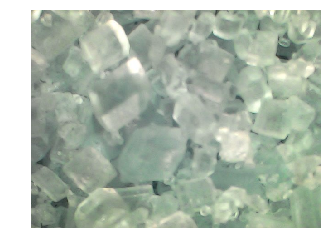

In [22]:
img=cv2.imread(img_name[0])
plt.axis("off") #retirar os eixos, porque o default dele vem com eixos
plt.imshow(img)

In [23]:
print(len(img_name))

75


In [25]:
y=np.zeros(len(img_name))
for i in range(len(img_name)):
  if 'AM1' in img_name[i]:
    y[i]=0
  elif 'AM2' in img_name[i]:
    y[i]=1
  elif 'AM3' in img_name[i]:
    y[i]=2
  elif 'AM4' in img_name[i]:
    y[i]=3
  elif 'AM5' in img_name[i]:
    y[i]=4
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4.]


0.0


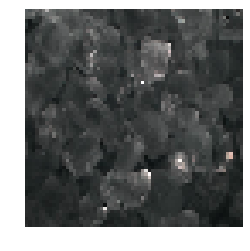

In [26]:
plt.axis("off")
plt.imshow(x[2])
print(y[2])

2.0


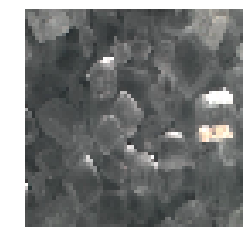

In [27]:
plt.axis("off")
plt.imshow(x[30])
print(y[30])

In [0]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.05, random_state=1)

In [29]:
type(x_train)

list

In [0]:
import numpy as np
x_train=np.array(x_train)
x_test=np.array(x_test)

In [31]:
'''
x_train = tf.image.resize_images(x_train, [32, 32])
x_test = tf.image.resize_images(x_test, [32, 32])
'''

'\nx_train = tf.image.resize_images(x_train, [32, 32])\nx_test = tf.image.resize_images(x_test, [32, 32])\n'

In [32]:
print(len(x))
print(len(y))
img_width = 150
img_height = 150

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

75
75


In [33]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)



'''training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')'''

batch_size = 32
training_set = train_datagen.flow(x_train, y_train, batch_size=batch_size)
test_set = val_datagen.flow(x_test,y_test, batch_size=batch_size)

classifier.fit_generator(training_set,
                         steps_per_epoch =10,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 50)

Epoch 1/10
10/10 [==============================] - 3s 344ms/step - loss: -9.8893 - acc: 0.1648 - val_loss: -15.9424 - val_acc: 0.2500
Epoch 2/10
10/10 [==============================] - 2s 236ms/step - loss: -16.0017 - acc: 0.1873 - val_loss: -15.9424 - val_acc: 0.2500
Epoch 3/10
10/10 [==============================] - 2s 228ms/step - loss: -17.5538 - acc: 0.1773 - val_loss: -15.9424 - val_acc: 0.2500
Epoch 4/10
10/10 [==============================] - 2s 236ms/step - loss: -17.5087 - acc: 0.1915 - val_loss: -15.9424 - val_acc: 0.2500
Epoch 5/10
10/10 [==============================] - 2s 237ms/step - loss: -17.0072 - acc: 0.2215 - val_loss: -15.9424 - val_acc: 0.2500
Epoch 6/10
10/10 [==============================] - 2s 222ms/step - loss: -14.6026 - acc: 0.1805 - val_loss: -15.9424 - val_acc: 0.2500
Epoch 7/10
10/10 [==============================] - 2s 235ms/step - loss: -13.5405 - acc: 0.1985 - val_loss: -15.9424 - val_acc: 0.2500
Epoch 8/10
10/10 [==============================]

In [34]:
print(y_train.shape)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(71,)
(71, 64, 64, 3)
(4, 64, 64, 3)
(4,)
